In [2]:
%matplotlib inline
%load_ext line_profiler
import numpy as np
import pandas as pd
import math
import scipy
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib import rc
from matplotlib.patches import Rectangle
import seaborn.apionly as sns
from IPython.display import HTML
import os, glob, sys
import warnings
import operator
import functools
from scipy.special import binom
warnings.simplefilter('always')

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [3]:
B = 15

In [4]:
# num = 16
# scores = [[int(j==0 and i>0) for i in range(num)] for j in range(num)]
# max_part = num-1
# calculated = [1]

# def get_combinations(n, x = max_part):
#     for i in range(calculated[0], n+1):
#         for j in range(1, x+1):
#             if (i-j<0):
#                 scores[i][j] = scores[i][j-1]
#                 continue
#             scores[i][j] = scores[i][j-1] + scores[i-j][j];
#     calculated[0] = n
#     return scores[n][:]

In [5]:
# pi = get_combinations(15)

In [6]:
# N_partitions = [pi[i]-pi[i-1] for i in range(1,len(pi))]

In [7]:
# Most Efficient Algorithm for calculating Partition Function given in the following website:
# http://jeromekelleher.net/generating-integer-partitions.html
# Notes can be found here: https://www.whitman.edu/mathematics/cgt_online/book/section03.03.html
def accel_asc(n):
    a = [0 for i in range(n + 1)]
    k = 1
    y = n - 1
    while k != 0:
        x = a[k - 1] + 1
        k -= 1
        while 2 * x <= y:
            a[k] = x
            y -= x
            k += 1
        l = k + 1
        while x <= y:
            a[k] = x
            a[l] = y
            yield a[:k + 2]
            x += 1
            y -= 1
        a[k] = x + y
        y = x + y - 1
        yield a[:k + 1]

In [8]:
partitions = []
for x in accel_asc(B):
    partitions.append(x)

In [9]:
partitions = sorted(partitions, key=len)

In [10]:
partitions

[[15],
 [1, 14],
 [2, 13],
 [3, 12],
 [4, 11],
 [5, 10],
 [6, 9],
 [7, 8],
 [1, 1, 13],
 [1, 2, 12],
 [1, 3, 11],
 [1, 4, 10],
 [1, 5, 9],
 [1, 6, 8],
 [1, 7, 7],
 [2, 2, 11],
 [2, 3, 10],
 [2, 4, 9],
 [2, 5, 8],
 [2, 6, 7],
 [3, 3, 9],
 [3, 4, 8],
 [3, 5, 7],
 [3, 6, 6],
 [4, 4, 7],
 [4, 5, 6],
 [5, 5, 5],
 [1, 1, 1, 12],
 [1, 1, 2, 11],
 [1, 1, 3, 10],
 [1, 1, 4, 9],
 [1, 1, 5, 8],
 [1, 1, 6, 7],
 [1, 2, 2, 10],
 [1, 2, 3, 9],
 [1, 2, 4, 8],
 [1, 2, 5, 7],
 [1, 2, 6, 6],
 [1, 3, 3, 8],
 [1, 3, 4, 7],
 [1, 3, 5, 6],
 [1, 4, 4, 6],
 [1, 4, 5, 5],
 [2, 2, 2, 9],
 [2, 2, 3, 8],
 [2, 2, 4, 7],
 [2, 2, 5, 6],
 [2, 3, 3, 7],
 [2, 3, 4, 6],
 [2, 3, 5, 5],
 [2, 4, 4, 5],
 [3, 3, 3, 6],
 [3, 3, 4, 5],
 [3, 4, 4, 4],
 [1, 1, 1, 1, 11],
 [1, 1, 1, 2, 10],
 [1, 1, 1, 3, 9],
 [1, 1, 1, 4, 8],
 [1, 1, 1, 5, 7],
 [1, 1, 1, 6, 6],
 [1, 1, 2, 2, 9],
 [1, 1, 2, 3, 8],
 [1, 1, 2, 4, 7],
 [1, 1, 2, 5, 6],
 [1, 1, 3, 3, 7],
 [1, 1, 3, 4, 6],
 [1, 1, 3, 5, 5],
 [1, 1, 4, 4, 5],
 [1, 2, 2, 2, 8],
 [1, 2, 2,

In [18]:
def multinomial(params):
    if len(params) == 1:
        return 1
    return binom(sum(params), params[-1]) * multinomial(params[:-1])

In [19]:
p_kB = dict()
for k in range(1,B):
    lists = [i for i in partitions if len(i)==k]
    sums = [functools.reduce(operator.mul, list(ss.poisson.pmf(lists[j],mu=1)))*multinomial(lists[j]) for j in range(len(lists))]
    p_kB[k] = sum(sums) 

In [20]:
p_kB

{1: 2.813234320208389e-13,
 2: 8.026796940891924e-06,
 3: 0.061061733648016064,
 4: 10.36067690027994,
 5: 394.27267039843537,
 6: 3254.7472247555124,
 7: 18265.455761948713,
 8: 52350.682457912626,
 9: 76057.41443732151,
 10: 105646.75793556738,
 11: 151079.522158794,
 12: 195286.1216735202,
 13: 266840.7831506594,
 14: 271842.19805690204}

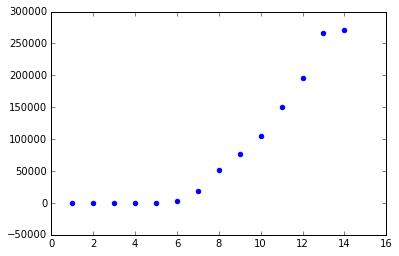

In [21]:
d = sorted(p_kB.items())
x, y = zip(*d)
plt.scatter(x,y,color="blue", s=20)
# plt.ylim([0,0.018])
plt.show()